In [38]:
import pandas as pd

from fastai.text.all import *

In [40]:
df = pd.read_csv("../data/lyrics_processed.csv", sep=";")
lyrics_phrase = pd.read_csv("../data/lyrics_phrase_eng.csv", sep=";")
clean_lyrics_phrase = pd.read_csv("../data/clean_lyrics_phrase_eng.csv", sep=";")

In [41]:
lyrics_phrase["text"] = lyrics_phrase["text"].str.lower()

In [44]:
lm_data = TextDataLoaders.from_df(clean_lyrics_phrase, text_col="text", is_lm=True, seed=42)

/home/tiago/anaconda3/envs/creative-ai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [45]:
lm_data.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj i 'm waiting on you again , so i do n't take the blame xxbos xxmaj suerte que senti lo que senti xxbos xxmaj and as the day was dawning xxbos xxmaj sing for the year ( sing it ) xxbos xxmaj had a mattress on the floor xxbos xxmaj but my friends you have seen nothin' xxbos xxmaj so i could take the back road xxbos xxmaj and i","xxmaj i 'm waiting on you again , so i do n't take the blame xxbos xxmaj suerte que senti lo que senti xxbos xxmaj and as the day was dawning xxbos xxmaj sing for the year ( sing it ) xxbos xxmaj had a mattress on the floor xxbos xxmaj but my friends you have seen nothin' xxbos xxmaj so i could take the back road xxbos xxmaj and i do"
1,"n't have to leave her xxbos xxmaj cause there we are again and i loved you so xxbos nan xxbos 'cause the way you hold me , hold me , hold me , hold me , hold me xxbos xxmaj tonight xxmaj i 'm a rock ' n ' roll star xxbos xxmaj and there 's no time to waste , to waste xxbos xxmaj you can fly away with me tonight","have to leave her xxbos xxmaj cause there we are again and i loved you so xxbos nan xxbos 'cause the way you hold me , hold me , hold me , hold me , hold me xxbos xxmaj tonight xxmaj i 'm a rock ' n ' roll star xxbos xxmaj and there 's no time to waste , to waste xxbos xxmaj you can fly away with me tonight xxbos"
2,"my libido xxbos xxmaj are we all we are xxbos xxmaj you see these xxunk ? xxmaj baby xxmaj i 'm your slave xxbos xxmaj but whatever , let 's get lost on mars xxbos xxmaj i 'll meet you there at the altar xxbos xxmaj the master of my sea , oh - ooh xxbos xxmaj and take the love instead xxbos xxmaj we just try to keep those secrets in","libido xxbos xxmaj are we all we are xxbos xxmaj you see these xxunk ? xxmaj baby xxmaj i 'm your slave xxbos xxmaj but whatever , let 's get lost on mars xxbos xxmaj i 'll meet you there at the altar xxbos xxmaj the master of my sea , oh - ooh xxbos xxmaj and take the love instead xxbos xxmaj we just try to keep those secrets in a"


In [46]:
learn = language_model_learner(lm_data, AWD_LSTM, metrics=[accuracy, Perplexity()], path="../models/")

In [47]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.055921,3.463859,0.339121,31.940006,00:46


In [48]:
learn.save('1epoch')

Path('../models/models/1epoch.pth')

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=2.2908675418875646e-06)

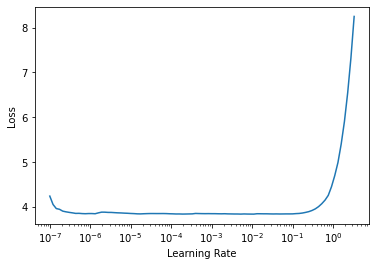

In [49]:
learn.lr_find()

In [50]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.655942,3.326793,0.360767,27.848886,00:52
1,3.509130,3.215227,0.377009,24.908949,00:53
2,3.347754,3.084131,0.396761,21.848478,00:53
3,3.210518,2.990613,0.414718,19.897877,00:53
4,3.111408,2.928418,0.425648,18.698030,00:53
5,3.039581,2.875966,0.436120,17.742561,00:53
6,2.961817,2.839267,0.442922,17.103216,00:53
7,2.918439,2.821544,0.446314,16.802769,00:53
8,2.898043,2.814327,0.448276,16.681946,00:53
9,2.883198,2.813179,0.448781,16.662798,01:04


In [51]:
learn.export('lyrics_without_tag.pkl')

---

In [26]:
def get_artist_tag(artist_name):
    return "x_" + ''.join([w[:2] + w[-2:] for w in artist_name.lower().split(" ")]) + "_x"

In [27]:
artist_list = df["artista"].unique().tolist()

In [31]:
artist = artist_list[1]
artist

'Ed Sheeran'

---

In [32]:
artist_tag = get_artist_tag(artist)

In [54]:
generate_lyrics = learn.predict("there's a lady who ", n_words=20)

for _ in range(10):
    generate_lyrics += learn.predict(generate_lyrics[-30] + "\n", n_words=20)
    
print(generate_lyrics)

there 's a lady who 's talking , i am gon na be This just do n't disappoint me i said thatTell me why are you so tired of running from the moment ? Back though you usedYou know i could be another of you And now i know that i need youa long time before you 'll see , I 'm so confused step into the jungle Whatu hhhhhhhhhh builtbuiltbuiltbuiltbuiltbuiltbuiltbuiltbuiltbuilt upupupupupupupupupup inininininininininin aaaaaaaaaa steelsteelsteelsteelsteelsteelsteelsteelsteelsteel carcarcarcarcarcarcarcarcarcar .......... Motto I 'll find a way ,. nan ( jenny in the backseat ) You know , you know , you knowy -da ¡ aquele grande ou Again and again I 'm again possible nan i wannanan The boy is made up , you 're a wild boy . nan InThen meet through the door You can feel my soul I 'm three ,Shower it all better Oh - oh - oh - oh Wo n't you letNothing shows everyone to blame Baby , do n't you thrill me when you close your eyes


failed :/